In [5]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
# Code from session 3.1

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        sts.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        sts.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    # Sample sigma^2 from the inverse-gamma distribution
    sigma2 = sts.invgamma.rvs(a=alpha, scale=beta, size=size)
    # Sample x from the normal distribution
    x = sts.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)
    return np.vstack((x, sigma2)).transpose()

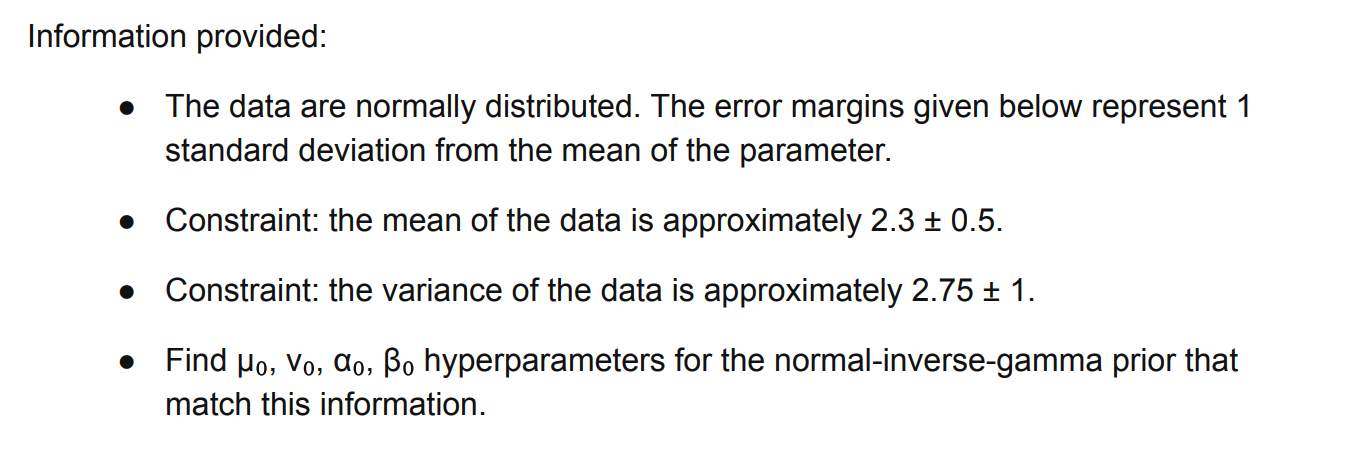

In [21]:
def u_mse(u):
    "Exp[x] = μ"
    return (u - 2.3)**2

def v_mse(a, b):
    "Exp[𝜎^2] = β / α-1"
    return ((b / (a-1)) - 2.75)**2

def u_sd_mse(v, a, b):
    return ((b / ((a-1) * v)) - 0.5)**2
    
def v_sd_mse(b, a):
    return (b**2 / ((a-2) * ((a-1)**2)) - 1)**2

def f(x):
    return  (u_mse(x[0]) +                               
             v_mse(x[2], x[3]) +                 
             u_sd_mse(x[1], x[2], x[3])+        
             v_sd_mse(x[1], x[2]))


result = minimize(f, [2.3, 2.75, 10, 10])
x_final = result.x
print('Started at', [2.3, 2.75, 10, 10])
print('Ended at', x_final)
print('\nf(%s) = %.6f' % (x_final, f(x_final)))

Started at [2.3, 2.75, 10, 10]
Ended at [2.30000009 5.49999778 4.48734311 9.59019275]

f([2.30000009 5.49999778 4.48734311 9.59019275]) = 0.000000


In [ ]:
Nathan:
Started with mu = 2.0, nu = 0.5, alpha = 2.5, beta = 0.5,
Ended with mu = 2.30, nu = 5.50, alpha = 2.13, beta = 3.11
    x = mu
    var_x = beta / ((alpha-1)*nu)
    sigma2 = beta / (alpha-1)
    var_sigma2 = (beta**2) / ((alpha-1)**2)*(alpha-2)
    #x = 2.3, var_x = 0.5, sigma2 = 2.75, var_sigma2 = 1
    return (x-2.3)**2 + (var_x-0.25)**2 + (sigma2-2.75)**2 + (var_sigma2-1)**2

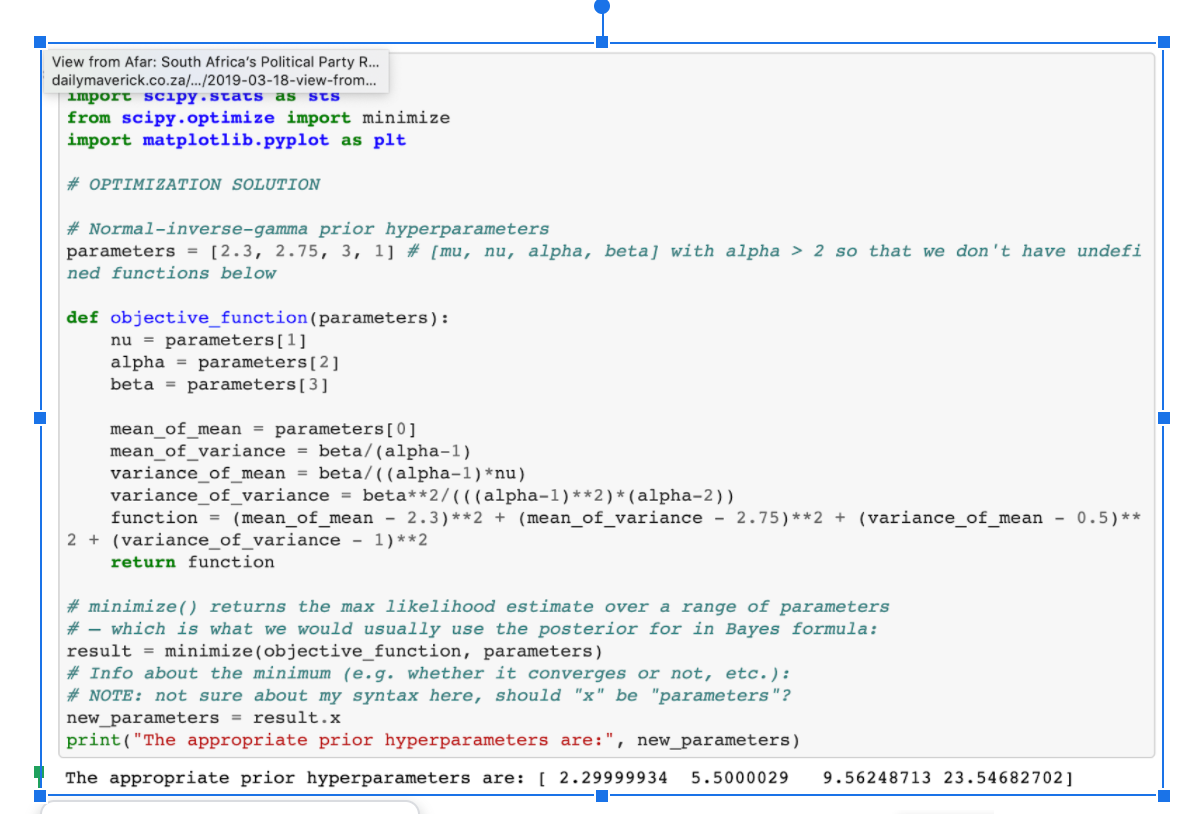

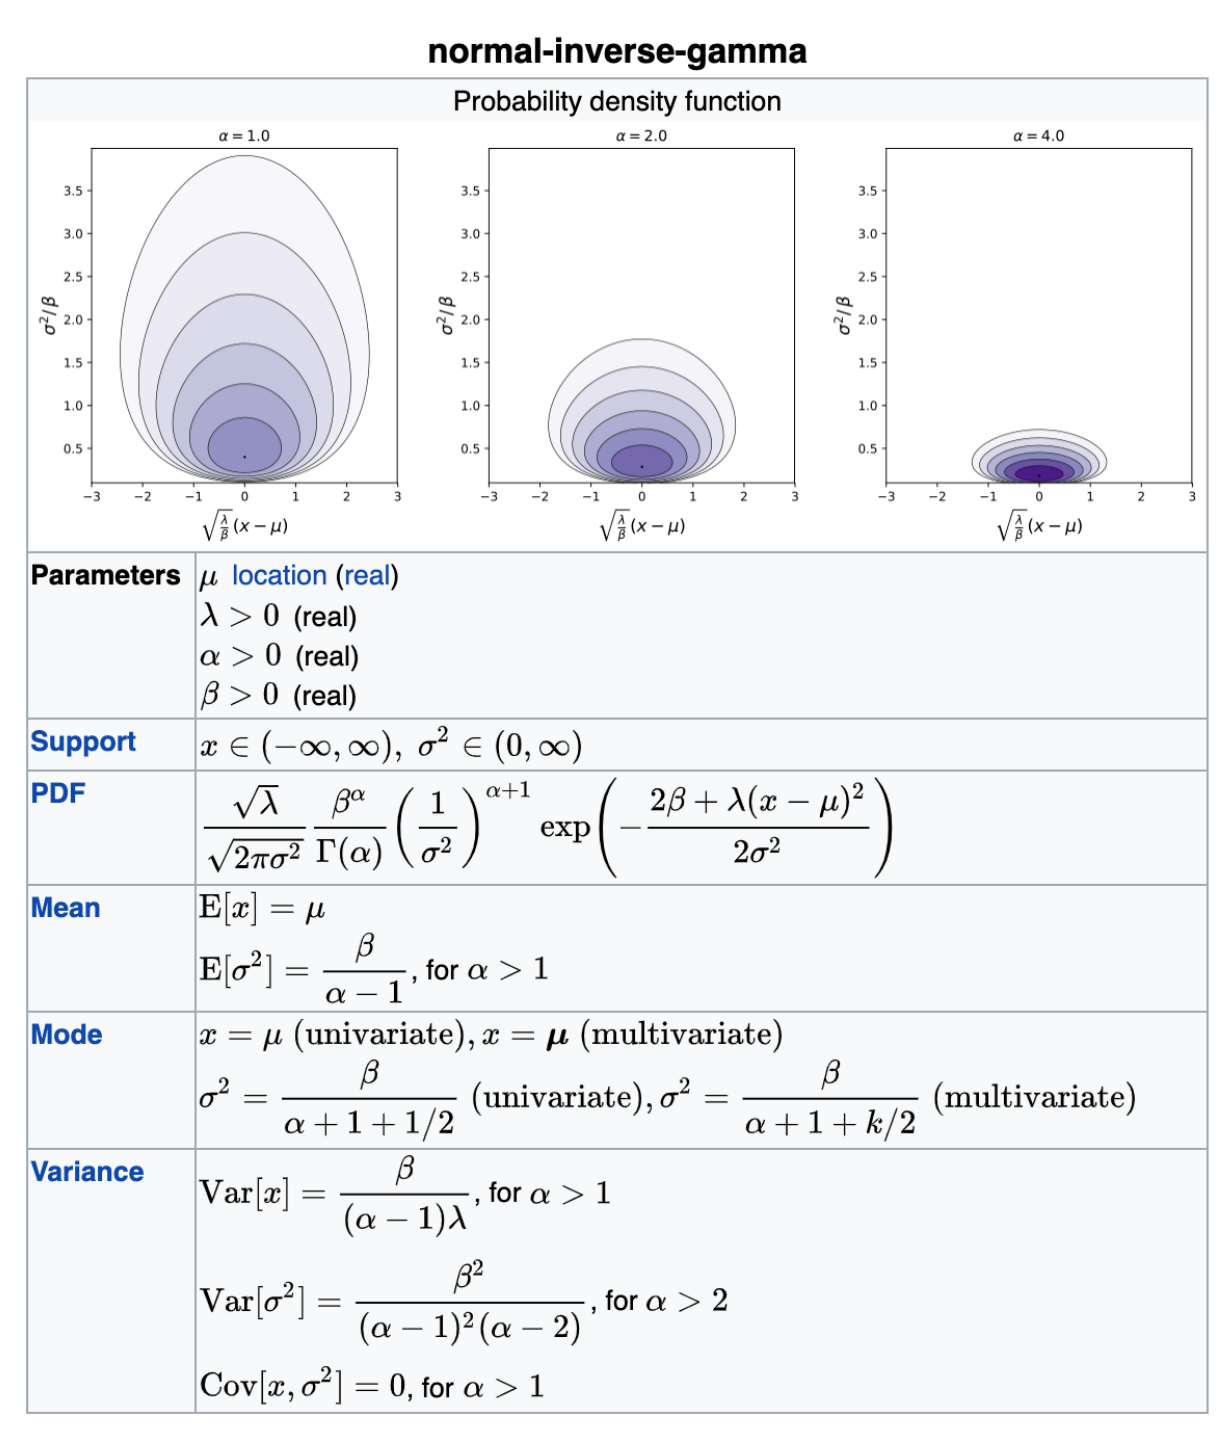